In [1]:
import os
import sys

path = os.path.abspath('')
print(path)
sys.path.append('../')

# os.path.dirname( __file__ )
sys.path.pop() 
sys.path.append(os.path.abspath(os.path.join(path, '../..')))

from copy import deepcopy

import numpy as np
import torch

from epde.preprocessing.smoothers import ANNSmoother

/home/maslyaev/Documents/EPDE/projects/control


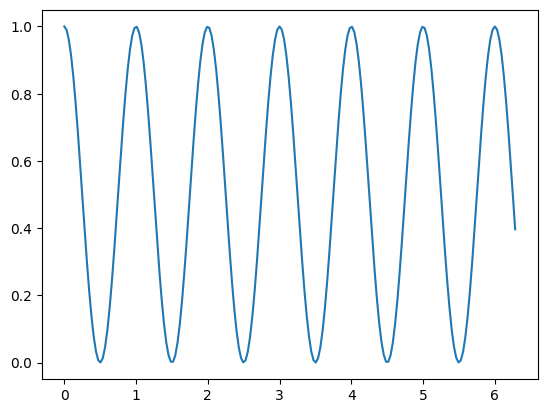

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)
ampl = 0.5; period = 1; phase_shift = 0.25
plt.plot(x, ampl*(np.sin(2*np.pi/period*(x + phase_shift)) + 1))

In [4]:
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
XX, YY = np.meshgrid(x, y)
u = np.sin(XX+YY)

In [5]:
import matplotlib.pyplot as plt
from epde.preprocessing.deriv_calculators import Heatmap

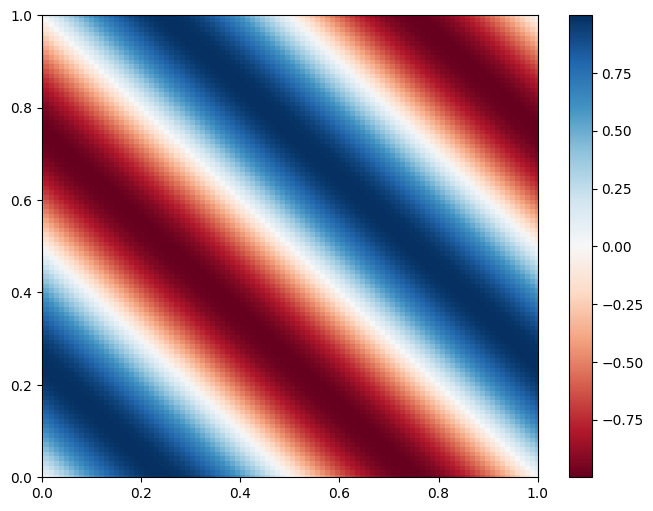

In [6]:
Heatmap(u)

In [7]:
smoother = ANNSmoother()
res = smoother(data = u, grid = [XX, YY], epochs_max=5*1e3, return_ann = True)

Surface training t=0, loss=0.6360941231250763
Surface training t=1, loss=0.6345657408237457
Surface training t=2, loss=0.6330397725105286
Surface training t=3, loss=0.6316004693508148
Surface training t=4, loss=0.630201905965805
Surface training t=5, loss=0.628786027431488
Surface training t=6, loss=0.6272106468677521
Surface training t=7, loss=0.6255322396755219
Surface training t=8, loss=0.6237760782241821
Surface training t=9, loss=0.621882289648056
Surface training t=10, loss=0.6197656989097595
Surface training t=11, loss=0.6176188588142395
Surface training t=12, loss=0.6152243912220001
Surface training t=13, loss=0.6126366257667542
Surface training t=14, loss=0.6099345684051514
Surface training t=15, loss=0.6070467531681061
Surface training t=16, loss=0.6039804220199585
Surface training t=17, loss=0.6007552444934845
Surface training t=18, loss=0.5971660912036896
Surface training t=19, loss=0.5936482846736908
Surface training t=20, loss=0.5897314250469208
Surface training t=21, los

/home/maslyaev/Documents/EPDE/epde/preprocessing/smoothers.py:99: UserWarning: Returning ANN from smoother. This should not occur anywhere, except selected experiments.
  warn('Returning ANN from smoother. This should not occur anywhere, except selected experiments.')


In [18]:
layered_params = [(idx, p, type(p)) for idx, p in enumerate(res[1].parameters())]
params = layered_params[0][1]

In [25]:

size = [W.data.size() for W in res[1].parameters()]
print(size)

[torch.Size([256, 2]), torch.Size([256]), torch.Size([64, 256]), torch.Size([64]), torch.Size([64, 64]), torch.Size([64]), torch.Size([1024, 64]), torch.Size([1024]), torch.Size([1, 1024]), torch.Size([1])]


In [40]:
res[1].state_dict()['0.weight'].size()

torch.Size([256, 2])

In [50]:
res[1].state_dict()['0.weight'][(0, 0)] -= 1.

In [57]:
from copy import deepcopy
res_c = deepcopy(res) 

In [61]:
print(res[1]._modules)
print(res_c[1]._modules)

OrderedDict({'0': Linear(in_features=2, out_features=256, bias=True), '1': Tanh(), '2': Linear(in_features=256, out_features=64, bias=True), '3': Tanh(), '4': Linear(in_features=64, out_features=64, bias=True), '5': Tanh(), '6': Linear(in_features=64, out_features=1024, bias=True), '7': Tanh(), '8': Linear(in_features=1024, out_features=1, bias=True)})
OrderedDict({'0': Linear(in_features=2, out_features=256, bias=True), '1': Tanh(), '2': Linear(in_features=256, out_features=64, bias=True), '3': Tanh(), '4': Linear(in_features=64, out_features=64, bias=True), '5': Tanh(), '6': Linear(in_features=64, out_features=1024, bias=True), '7': Tanh(), '8': Linear(in_features=1024, out_features=1, bias=True)})


In [55]:
list(res[1].state_dict().keys())

['0.weight',
 '0.bias',
 '2.weight',
 '2.bias',
 '4.weight',
 '4.bias',
 '6.weight',
 '6.bias',
 '8.weight',
 '8.bias']

In [38]:
for idx, val in enumerate(res[1].state_dict()['0.weight']):
    print(idx, val)

0 tensor([ 0.1860, -0.5509])
1 tensor([-0.3298,  0.6532])
2 tensor([-0.3605,  0.3077])
3 tensor([ 0.5249, -0.5732])
4 tensor([0.0308, 0.5860])
5 tensor([-0.0015,  0.2089])
6 tensor([-0.6552, -0.4511])
7 tensor([0.3432, 0.1151])
8 tensor([0.2963, 0.1301])
9 tensor([-0.5679,  0.4362])
10 tensor([0.5936, 0.3052])
11 tensor([-0.0305,  0.3282])
12 tensor([ 0.3244, -0.6072])
13 tensor([-0.4395,  0.1296])
14 tensor([-0.0521,  0.4183])
15 tensor([0.0813, 0.3110])
16 tensor([-0.0990, -0.5903])
17 tensor([-0.5754,  0.6193])
18 tensor([-0.0648, -0.6324])
19 tensor([-0.1550, -0.3335])
20 tensor([-0.3919, -0.4582])
21 tensor([0.4900, 0.1740])
22 tensor([ 0.3180, -0.4352])
23 tensor([-0.0235, -0.6075])
24 tensor([-0.6012, -0.0366])
25 tensor([0.6085, 0.4989])
26 tensor([-0.2876, -0.3188])
27 tensor([0.2927, 0.1377])
28 tensor([ 0.1549, -0.1743])
29 tensor([ 0.2764, -0.0945])
30 tensor([-0.2448, -0.2381])
31 tensor([0.0143, 0.5831])
32 tensor([0.2384, 0.0602])
33 tensor([-0.1783, -0.4304])
34 tensor(

In [17]:
params = [W for W in res[1].parameters()]
len(params)

10

In [6]:
grid = [XX, YY]
tgrid = torch.from_numpy(np.array([subgrid.reshape(-1) for subgrid in grid])).float().T

In [7]:
op_vals = res[1](tgrid)[..., 0]
op_vals.shape

torch.Size([10000])

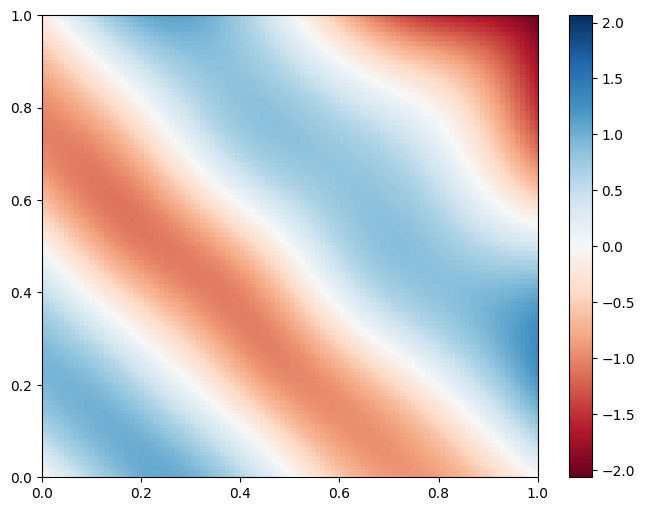

In [8]:
Heatmap(op_vals.detach().numpy().reshape(XX.shape))

In [14]:
tgrid.requires_grad = True
op_vals = res[1](tgrid)[..., 0].sum(0)
op_vals_dot = torch.autograd.grad(outputs = op_vals, inputs = tgrid)

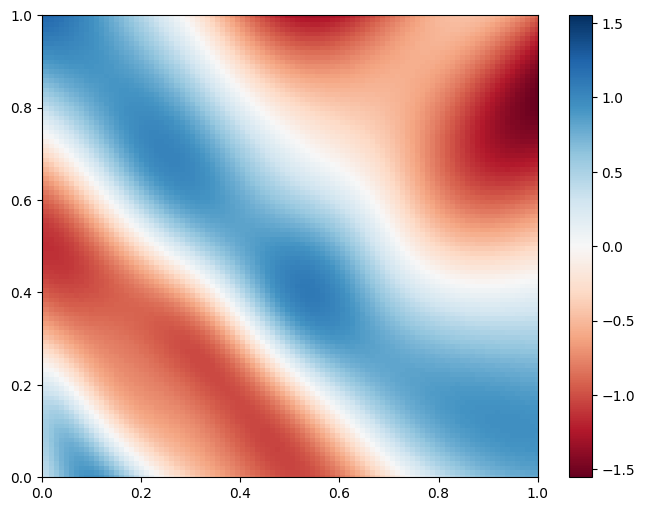

In [19]:
Heatmap(op_vals_dot[0].detach().numpy()[:, 0].reshape((100, 100)))